In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd
import math
import shutil
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Drive Path
drive_dir=os.path.join(os.getcwd(),"drive","MyDrive","archive","data")

#Dataframe Creation
train_labels=os.path.join(drive_dir,"train_solution_bounding_boxes (1).csv")

train_imgs_dir=os.path.join(drive_dir,"training_images")
test_imgs_dir=os.path.join(drive_dir,"testing_images")

imgs_list=list(sorted(os.listdir(train_imgs_dir)))
idxs=list(range(len(imgs_list)))
np.random.shuffle(idxs)

train_idx=idxs[:int(0.8*len(idxs))]
val_idx=idxs[int(0.8*len(idxs)):]


imgs_list=list(sorted(os.listdir(train_imgs_dir)))

In [ ]:
df=pd.read_csv(train_labels)

width=676
height=380

df["class"]=0
df.rename(columns={'image':'img_name'}, inplace=True)

df["x_centre"]=(df["xmin"]+df["xmax"])/2
df["y_centre"]=(df["ymin"]+df["ymax"])/2
df["width"]=(df["xmax"]-df["xmin"])
df["height"]=(df["ymax"]-df["ymin"])

#normalizing bounding box coordinates
df["x_centre"]=df["x_centre"]/width
df["y_centre"]=df["y_centre"]/height
df["width"]=df["width"]/width
df["height"]=df["height"]/height

df_yolo=df[["img_name","class","x_centre","y_centre","width","height"]]
df_yolo.head()

,img_name,class,x_centre,y_centre,width,height
0,vid_4_1000.jpg,0,0.450434,0.539817,0.068741,0.095238
1,vid_4_10000.jpg,0,0.100217,0.557191,0.155572,0.129987
2,vid_4_10040.jpg,0,0.444645,0.543678,0.181621,0.157014
3,vid_4_10020.jpg,0,0.833213,0.531451,0.197540,0.155727
4,vid_4_10060.jpg,0,0.110347,0.559122,0.171491,0.136422


In [ ]:
# train and test subdirectories with labels directory

from os import path
yolo_dir=os.path.join(drive_dir,"yolov8")
if path.exists(yolo_dir) == False:
  os.mkdir(yolo_dir)

labels_dir=os.path.join(yolo_dir,"labels")
if path.exists(labels_dir) == False:
  os.mkdir(labels_dir)

if path.exists(labels_dir+"/train") == False:
  os.mkdir(labels_dir+"/train")
if path.exists(labels_dir+"/val") == False:
  os.mkdir(labels_dir+"/val")

images_dir=os.path.join(yolo_dir,"images")
if path.exists(images_dir) == False:
  os.mkdir(images_dir)

if path.exists(images_dir+"/train") == False:
  os.mkdir(images_dir+"/train")
if path.exists(images_dir+"/val") == False:
  os.mkdir(images_dir+"/val")
'''
for idx,img_name in enumerate(imgs_list):
    subset="train"
    if idx in val_idx:
        subset="val"

    if np.isin(img_name,df_yolo["img_name"]):
        columns=["class","x_centre","y_centre","width","height"]
        img_bbox=df_yolo[df_yolo["img_name"]==img_name][columns].values

        label_file_path=os.path.join(labels_dir,subset,img_name[:-4]+".txt")
        with open(label_file_path,"w+") as f:
            for row in img_bbox:
                text=" ".join(row.astype(str))
                f.write(text)
                f.write("\n")

    old_image_path=os.path.join(train_imgs_dir,img_name)
    new_image_path=os.path.join(images_dir,subset,img_name)
    shutil.copy(old_image_path,new_image_path)
'''

'\nfor idx,img_name in enumerate(imgs_list):\n    subset="train"\n    if idx in val_idx:\n        subset="val"\n\n    if np.isin(img_name,df_yolo["img_name"]):\n        columns=["class","x_centre","y_centre","width","height"]\n        img_bbox=df_yolo[df_yolo["img_name"]==img_name][columns].values\n\n        label_file_path=os.path.join(labels_dir,subset,img_name[:-4]+".txt")\n        with open(label_file_path,"w+") as f:\n            for row in img_bbox:\n                text=" ".join(row.astype(str))\n                f.write(text)\n                f.write("\n")\n\n    old_image_path=os.path.join(train_imgs_dir,img_name)\n    new_image_path=os.path.join(images_dir,subset,img_name)\n    shutil.copy(old_image_path,new_image_path)\n'

In [ ]:
import yaml
yolo_format=dict(path=yolo_dir,
                 train=images_dir+"/train",
                 val=images_dir+"/val",
                 nc=1,
                 names={0:"car"})

with open(yolo_dir+'/yolo.yaml', 'w') as outfile:
    yaml.dump(yolo_format, outfile, default_flow_style=False)

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
model=YOLO('yolov8m.pt')
model.train(data=yolo_dir+'/yolo.yaml',epochs=50,patience=5,batch=8,
                    lr0=0.0005,imgsz=640)

ERROR: Operation cancelled by user


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/archive/data/yolov8/yolo.yaml, epochs=50, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

KeyboardInterrupt: ignored

In [ ]:
path_best_weights="/content/runs/detect/train6/weights/best.pt"
model = YOLO(path_best_weights)

metrics = model.val()

In [ ]:
with torch.no_grad():
    results=model.predict(source=test_imgs_dir,conf=0.50,iou=0.75)

In [ ]:
prediction_dir=os.path.join(yolo_dir,"predictions")
if path.exists(prediction_dir) == False:
  os.mkdir(prediction_dir)

In [ ]:
test_img_list=[]
for result in results:
    if len(result.boxes.xyxy):
        name=result.path.split("/")[-1].split(".")[0]
        boxes=result.boxes.xyxy.cpu().numpy()
        scores=result.boxes.conf.cpu().numpy()

        test_img_list.append(name)

        label_file_path=os.path.join(prediction_dir,name+".txt")
        with open(label_file_path,"w+") as f:
            for score,box in zip(scores,boxes):
                text=f"{score:0.4f} "+" ".join(box.astype(str))
                f.write(text)
                f.write("\n")

In [ ]:
def show_bbox(img,boxes,scores,name,axis=0,color=(0,255,0)):
    boxes=boxes.astype(int)
    scores=scores
    img=img.copy()
    for i,box in enumerate(boxes):
        score=f"{scores[i]:.4f}"
        cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),color,2)
        y=box[1]-10 if box[1]-10>10 else box[1]+10
        cv2.putText(img,score,(box[0],y),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    plt.imshow(img)
    plt.savefig(name+".png")
    #axis.imshow(img)
    #axis.axis("off")

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(12,12))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
#ax=axes.flatten()

imgs_name=np.random.choice(test_img_list,15)
imgs_name=['vid_5_400','vid_5_26720']
for i,img_name in enumerate(imgs_name):
    img_file_path=os.path.join(test_imgs_dir,img_name+".jpg")
    img=cv2.imread(img_file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    label_file_path=os.path.join(prediction_dir,img_name+".txt")
    label=pd.read_csv(label_file_path,sep=" ",header=None).values
    scores=label[:,0]
    boxes=label[:,1:]
    show_bbox(img,boxes,scores,name=img_name+"_yolov8")

plt.savefig("1.png")

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.transforms.functional as FT
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import subprocess
import os
from PIL import Image
import time
from tqdm import tqdm

from IPython import display
display.clear_output()

In [ ]:
from os import path
drive_dir=os.path.join(os.getcwd(),"drive","MyDrive","archive","data")

yolo_dir=os.path.join(drive_dir,"yolov8")
if path.exists(yolo_dir) == False:
  os.mkdir(yolo_dir)

labels_dir=os.path.join(yolo_dir,"labels")
if path.exists(labels_dir) == False:
  os.mkdir(labels_dir)

if path.exists(labels_dir+"/train") == False:
  os.mkdir(labels_dir+"/train")
if path.exists(labels_dir+"/val") == False:
  os.mkdir(labels_dir+"/val")

images_dir=os.path.join(yolo_dir,"images")
if path.exists(images_dir) == False:
  os.mkdir(images_dir)

if path.exists(images_dir+"/train") == False:
  os.mkdir(images_dir+"/train")
if path.exists(images_dir+"/val") == False:
  os.mkdir(images_dir+"/val")

In [ ]:
def intersection_over_union(boxes_preds, boxes_labels, box_format="midpoint"):
    """
    Calculates intersection over union
    Parameters:
        boxes_preds (tensor): Predictions of Bounding Boxes (BATCH_SIZE, 4)
        boxes_labels (tensor): Correct labels of Bounding Boxes (BATCH_SIZE, 4)
        box_format (str): midpoint/corners, if boxes (x,y,w,h) or (x1,y1,x2,y2)
    Returns:
        tensor: Intersection over union for all examples
    """
    if box_format == "midpoint" :
        box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
        box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
        box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
        box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
        box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
        box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
        box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
        box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2

    if box_format == "corners" :
        box1_x1, box1_y1 = boxes_preds[..., 0:1], boxes_preds[..., 1:2]
        box1_x2, box1_y2 = boxes_preds[..., 2:3], boxes_preds[..., 3:4]
        box2_x1, box2_y1 = boxes_labels[..., 0:1], boxes_labels[..., 1:2]
        box2_x2, box2_y2 = boxes_labels[..., 2:3], boxes_labels[..., 3:4]

    x1, y1 = torch.max(box1_x1, box2_x1), torch.max(box1_y1, box2_y1)
    x2, y2 = torch.min(box1_x2, box2_x2), torch.min(box1_y2, box2_y2)

    inter = (x2-x1).clamp(0) * (y2-y1).clamp(0)
    box1_area = abs( (box1_x2 - box1_x1) * (box1_y2 - box1_y1) )
    box2_area = abs( (box2_x2 - box2_x1) * (box2_y2 - box2_y1) )
    uni = box1_area + box2_area - inter

    return inter / (uni + 1e-6)


def non_max_suppression(bboxes, iou_threshold, threshold, box_format="corners"):
    """
    Does Non Max Suppression given bboxes
    Parameters:
        bboxes (list): list of lists containing all bboxes with each bboxes
        specified as [class_pred, prob_score, x1, y1, x2, y2]
        iou_threshold (float): threshold where predicted bboxes is correct
        threshold (float): threshold to remove predicted bboxes (independent of IoU)
        box_format (str): "midpoint" or "corners" used to specify bboxes
    Returns:
        list: bboxes after performing NMS given a specific IoU threshold
    """

    assert type(bboxes) == list

    bboxes = [box for box in bboxes if box[1] > threshold]
    bboxes = sorted(bboxes, key=lambda x: x[1], reverse=True)
    bboxes_after_nms = []

    while bboxes:
        chosen_box = bboxes.pop(0)

        bboxes = [
            box
            for box in bboxes
            if box[0] != chosen_box[0]
            or intersection_over_union(
                torch.tensor(chosen_box[2:]),
                torch.tensor(box[2:]),
                box_format=box_format,
            )
            < iou_threshold
        ]

        bboxes_after_nms.append(chosen_box)

    return bboxes_after_nms

def mean_average_precision(
    pred_boxes, true_boxes, iou_threshold=0.5, box_format="midpoint", num_classes=20
):
    """
    Calculates mean average precision
    Parameters:
        pred_boxes (list): list of lists containing all bboxes with each bboxes
        specified as [train_idx, class_prediction, prob_score, x1, y1, x2, y2]
        true_boxes (list): Similar as pred_boxes except all the correct ones
        iou_threshold (float): threshold where predicted bboxes is correct
        box_format (str): "midpoint" or "corners" used to specify bboxes
        num_classes (int): number of classes
    Returns:
        float: mAP value across all classes given a specific IoU threshold
    """

    avg_precisions = []
    epsilon = 1e-6 # used for numerical stability
    for c in range(num_classes):
        detections, ground_truths = [], []
        for detection in pred_boxes:
            if detection[1] == c: detections.append(detection)
        for true_box in true_boxes :
            if true_box[1] == c: ground_truths.append(true_box)
        amount_bboxes = Counter([gt[0] for gt in ground_truths])
        for key,val in amount_bboxes.items(): amount_bboxes[key] = torch.zeros(val)
        detections.sort(key=lambda x:x[2], reverse=True)
        TP, FP, total_true_bboxes = torch.zeros(len(detections)), torch.zeros(len(detections)), len(ground_truths)
        if total_true_bboxes == 0:
            continue
        for detection_idx, detection in enumerate(detections):
            ground_truth_img = [ bbox for bbox in ground_truths if bbox[0] == detection[0] ]
            num_gts = len(ground_truth_img)
            best_iou = 0
            for idx, gt in enumerate(ground_truth_img) :
                iou = intersection_over_union(torch.tensor(detection[3:]), torch.tensor(gt[3:]), box_format=box_format,)
                if iou > best_iou :
                    best_iou = iou
                    best_gt_idx = idx
            if best_iou > iou_threshold :
                if amount_bboxes[detection[0]][best_gt_idx] == 0:
                    TP[detection_idx] = 1
                    amount_bboxes[detection[0]][best_gt_idx] = 1
                else :
                    FP[detection_idx] = 1
            else :
                FP[detection_idx] = 1
        TP_cumsum, FP_cumsum = torch.cumsum(TP, dim=0), torch.cumsum(FP, dim=0)
        recalls = TP_cumsum / (total_true_bboxes + epsilon)
        precisions = torch.divide(TP_cumsum, (TP_cumsum + FP_cumsum + epsilon))
        precisions, recalls = torch.cat((torch.tensor([1]), precisions)), torch.cat((torch.tensor([0]), recalls))
        avg_precisions.append(torch.trapz(precisions, recalls))

    return sum(avg_precisions) / (len(avg_precisions) + epsilon)


def plot_image(image, boxes):
    """Plots predicted bounding boxes on the image"""
    im = np.array(image)
    height, width, _ = im.shape
    fig, ax = plt.subplots(1)
    ax.imshow(im)
    for box in boxes:
        box = box[2:]
        assert len(box) == 4, "Got more values than in x, y, w, h, in a box!"
        upper_left_x = box[0] - box[2] / 2
        upper_left_y = box[1] - box[3] / 2
        rect = patches.Rectangle(
            (upper_left_x * width, upper_left_y * height),
            box[2] * width, box[3] * height,
            linewidth=1, edgecolor="r", facecolor="none",
        )
        ax.add_patch(rect)
    plt.show()

def get_bboxes(loader, model, iou_threshold, threshold, pred_format="cells", box_format="midpoint", device="cuda"):
    all_pred_boxes = []
    all_true_boxes = []

    # make sure model is in eval before get bboxes
    model.eval()
    train_idx = 0

    for batch_idx, (x, labels) in enumerate(loader):
        x = x.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            predictions = model(x)

        batch_size = x.shape[0]
        true_bboxes = cellboxes_to_boxes(labels)
        bboxes = cellboxes_to_boxes(predictions)

        for idx in range(batch_size):
            nms_boxes = non_max_suppression(
                bboxes[idx],
                iou_threshold=iou_threshold,
                threshold=threshold,
                box_format=box_format,
            )
            for nms_box in nms_boxes:
                all_pred_boxes.append([train_idx] + nms_box)

            for box in true_bboxes[idx]:
                # many will get converted to 0 pred
                if box[1] > threshold:
                    all_true_boxes.append([train_idx] + box)

            train_idx += 1

    model.train()
    return all_pred_boxes, all_true_boxes



def convert_cellboxes(predictions, S=7):
    """
    Converts bounding boxes output from Yolo with
    an image split size of S into entire image ratios
    rather than relative to cell ratios.
    """

    predictions = predictions.to("cpu")
    batch_size = predictions.shape[0]
    predictions = predictions.reshape(batch_size, 7, 7, 30)
    bboxes1 = predictions[..., 21:25]
    bboxes2 = predictions[..., 26:30]
    scores = torch.cat(
        (predictions[..., 20].unsqueeze(0), predictions[..., 25].unsqueeze(0)), dim=0
    )
    best_box = scores.argmax(0).unsqueeze(-1)
    best_boxes = bboxes1 * (1 - best_box) + best_box * bboxes2
    cell_indices = torch.arange(7).repeat(batch_size, 7, 1).unsqueeze(-1)
    x = 1 / S * (best_boxes[..., :1] + cell_indices)
    y = 1 / S * (best_boxes[..., 1:2] + cell_indices.permute(0, 2, 1, 3))
    w_y = 1 / S * best_boxes[..., 2:4]
    converted_bboxes = torch.cat((x, y, w_y), dim=-1)
    predicted_class = predictions[..., :20].argmax(-1).unsqueeze(-1)
    best_confidence = torch.max(predictions[..., 20], predictions[..., 25]).unsqueeze(
        -1
    )
    converted_preds = torch.cat(
        (predicted_class, best_confidence, converted_bboxes), dim=-1
    )

    return converted_preds


def cellboxes_to_boxes(out, S=7):
    converted_pred = convert_cellboxes(out).reshape(out.shape[0], S * S, -1)
    converted_pred[..., 0] = converted_pred[..., 0].long()
    all_bboxes = []

    for ex_idx in range(out.shape[0]):
        bboxes = []

        for bbox_idx in range(S * S):
            bboxes.append([x.item() for x in converted_pred[ex_idx, bbox_idx, :]])
        all_bboxes.append(bboxes)

    return all_bboxes

def makeCSVfile(dataset, folder):
    images = subprocess.check_output("ls "+ dataset.location + folder + '/images', shell=True, text=True).split('\n')[:-1]
    labels = subprocess.check_output("ls "+ dataset.location + folder + '/labels', shell=True, text=True).split('\n')[:-1]
    return pd.DataFrame(data = {'image': images, 'text':labels})

def save_checkpoint(state, filename="my_checkpoint.pth.tar", exit_training=False):
    print("=> Saving checkpoint")
    torch.save(state, filename)
    if exit_training : exit()

def load_checkpoint(checkpoint, model, optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

In [ ]:
# Conv2d BatchNorm2d LeakyReLU MaxPool2d

import torch
import torch.nn as nn

architecture_config = [
    (7, 64, 2, 3),
    "M",
    (3, 192, 1, 1),
    "M",
    (1, 128, 1, 0),
    (3, 256, 1, 1),
    (1, 256, 1, 0),
    (3, 512, 1, 1),
    "M",
    [(1, 256, 1, 0), (3, 512, 1, 1), 4],
    (1, 512, 1, 0),
    (3, 1024, 1, 1),
    "M",
    [(1, 512, 1, 0), (3, 1024, 1, 1), 2],
    (3, 1024, 1, 1),
    (3, 1024, 2, 1),
    (3, 1024, 1, 1),
    (3, 1024, 1, 1),
]

class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.batchnorm = nn.BatchNorm2d(out_channels) # not present in the original YOLO model
        self.leakyrelu = nn.LeakyReLU(0.1)

    def forward(self, x): return self.leakyrelu(self.batchnorm(self.conv(x)))

class Yolov1(nn.Module):
    def __init__(self, in_channels=3, **kwargs):
        super().__init__()
        self.name='Yolov1'
        self.architecture = architecture_config
        self.in_channels = in_channels
        self.darknet = self._create_conv_layers(self.architecture)
        self.fcs = self._create_fcs(**kwargs)

    def forward(self, x): return self.fcs(torch.flatten(self.darknet(x), start_dim=1))

    def _create_conv_layers(self, architecture):
        in_channels = self.in_channels
        layers = []
        for x in architecture:
            if type(x)==tuple:
                layers += [ CNNBlock(in_channels, x[1], kernel_size=x[0], stride=x[2], padding=x[3]) ]
                in_channels = x[1]
            elif type(x)==str:
                layers += [ nn.MaxPool2d(kernel_size=2, stride=2) ]
            elif type(x)==list:
                conv1, conv2, num_repeats = x[0], x[1], x[2]
                for i in range(num_repeats):
                    layers += [ CNNBlock(in_channels, conv1[1], kernel_size=conv1[0], stride=conv1[2], padding=conv1[3]) ]
                    layers += [ CNNBlock(conv1[1], conv2[1], kernel_size=conv2[0], stride=conv2[2], padding=conv2[3]) ]
                    in_channels = conv2[1]
        return nn.Sequential(*layers)

    def _create_fcs(self, split_size, num_boxes, num_classes):
        S, B, C = split_size, num_boxes, num_classes
        return nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024*S*S,496), #4096 in YOLO paper
            nn.Dropout(0.0),
            nn.LeakyReLU(0.1),
            nn.Linear(496, S*S*(B*5+C))
        )
    def predict(self, source,conf=0.50,iou=0.75):
      self.eval()

      test_img_list=list(sorted(os.listdir(source)))
      result={}
      for image in test_img_list:
        img_file_path=os.path.join(source,image)
        img = Image.open(img_file_path)
        for t in [transforms.Resize((448, 448)), transforms.ToTensor(),]:
          img = t(img)
        img=torch.unsqueeze(img, dim=0)
        img = img.to(DEVICE)
        bboxes = cellboxes_to_boxes(self(img))
        bboxes = non_max_suppression(bboxes[0], iou_threshold=iou, threshold=conf, box_format="midpoint")
        result[image]=bboxes
      return result


In [ ]:
class YoloLoss(nn.Module):
    def __init__(self, S=7, B=2, C=20):
        super(YoloLoss, self).__init__()
        self.mse = nn.MSELoss(reduction="sum")
        self.S, self.B, self.C = S, B, C
        self.lambda_coord, self.lambda_noobj = 5, .5

    def forward(self, predictions, target ):
        predictions = predictions.reshape(-1, self.S, self.S, self.B*5+self.C)
        ious = torch.cat(
            (intersection_over_union(predictions[...,21:25], target[...,21:25]).unsqueeze(0),
            intersection_over_union(predictions[...,26:30], target[...,21:25]).unsqueeze(0))
        )
        _, bestbox = torch.max(ious, dim=0)
        exists_box = target[...,20:21]

        box_predictions =  exists_box * ( (1-bestbox)*predictions[...,21:25] + bestbox*predictions[...,26:30] )
        box_predictions[...,2:4] = torch.sign(box_predictions[...,2:4])*torch.sqrt(torch.abs(box_predictions[...,2:4]+1e-6)) # WOW
        box_targets = exists_box * target[...,21:25] #!!!
        box_targets[...,2:4] = torch.sqrt(box_targets[...,2:4])

        box_loss = self.mse(
            torch.flatten(box_predictions, end_dim=-2),
            torch.flatten(box_targets, end_dim=-2)
        )
        object_loss = self.mse(
            torch.flatten(exists_box * ( (1-bestbox)*predictions[...,20:21] + bestbox*predictions[...,25:26] )),
            torch.flatten(exists_box)
        )
        no_object_loss=self.mse(
            torch.flatten((1-exists_box) * predictions[...,20:21], end_dim=-2),
            torch.flatten((1-exists_box) * target[...,20:21], end_dim=-2)
        ) + self.mse(
            torch.flatten((1-exists_box) * predictions[...,25:26], end_dim=-2),
            torch.flatten((1-exists_box) * target[...,20:21], end_dim=-2)
        )
        class_loss = self.mse(
            torch.flatten(exists_box * predictions[...,:20], end_dim=-2),
            torch.flatten(exists_box * target[...,:20], end_dim=-2)
        )
        loss = (self.lambda_coord*box_loss + object_loss + self.lambda_noobj*no_object_loss + class_loss)
        return loss

In [ ]:
class CARDataset(torch.utils.data.Dataset):
    def __init__(self, label_dir, img_dir, S=7, B=2, C=20, transform=None):
        self.label_dir, self.img_dir = label_dir, img_dir
        self.image_list=list(sorted(os.listdir(img_dir)))
        self.transform = transform
        self.S, self.B, self.C = S, B, C

    def __len__(self) : return len(self.image_list)

    def __getitem__(self, index):
        label_path = os.path.join(self.label_dir, self.image_list[index][:len(self.image_list[index])-3]+"txt")
        image = Image.open(os.path.join(self.img_dir, self.image_list[index]))
        boxes = []
        if path.exists(label_path) == True:
          with open(label_path) as f:
              for label in f.readlines():
                  class_label, x, y, width, height = [float(x) if float(x)!=int(float(x)) else int(float(x)) for x in label.strip().split()]
                  boxes.append([class_label, x, y, width, height])

        if self.transform: image, boxes = self.transform(image, torch.tensor(boxes))
        label_matrix = torch.zeros(self.S, self.S, self.B*5+self.C)
        for box in boxes:
            class_label, x, y, width, height = box#.tolist()
            i, j = int(y*self.S), int(x*self.S)
            x_cell, y_cell, w_cell, h_cell= x*self.S-j, y*self.S-i, width*self.S, height*self.S
            if label_matrix[i, j, 20] == 0 :
                label_matrix[i, j, 20], label_matrix[i, j, int(class_label)] = 1, 1
                label_matrix[i, j, 21:25] = torch.tensor([x_cell, y_cell, w_cell, h_cell])

        return image, label_matrix

In [ ]:
"""
Main file for training Yolo model on Pascal VOC dataset
"""
seed = 123
torch.manual_seed(seed)

# Hyperparameters etc.
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
#DEVICE = "cpu"
BATCH_SIZE = 16 # 64 in original
WEIGHT_DECAY = 0
EPOCHS = 10
NUM_WORKERS = 2
PIN_MEMORY = True
LOAD_MODEL = True
LOAD_MODEL_FILE = "./overfit.pth.tar"
IMG_DIR_TRAIN = images_dir+"/train"
LABEL_DIR_TRAIN = labels_dir+"/train"
IMG_DIR_TEST = images_dir+"/val"
LABEL_DIR_TEST = labels_dir+"/val"


class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img, bboxes):
        for t in self.transforms:
            img, bboxes = t(img), bboxes

        return img, bboxes


transform = Compose([transforms.Resize((448, 448)), transforms.ToTensor(),])


def train_fn(train_loader, model, optimizer, loss_fn):
    loop = tqdm(train_loader, leave=True)
    mean_loss = []

    for batch_idx, (x, y) in enumerate(loop):
        x, y = x.to(DEVICE), y.to(DEVICE)
        out = model(x)
        loss = loss_fn(out, y)
        mean_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # update progress bar
        loop.set_postfix(loss=loss.item())
    #scheduler.step()

    print(f"Mean loss was {sum(mean_loss)/len(mean_loss)}")


map_array=[]
total_epoch=0
model = Yolov1(split_size=7, num_boxes=2, num_classes=20).to(DEVICE)
optimizer = optim.Adam( model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY )
#scheduler = ExponentialLR(optimizer, gamma=0.9)
loss_fn = YoloLoss()

if LOAD_MODEL:
    load_checkpoint(torch.load(LOAD_MODEL_FILE), model, optimizer)
    total_epoch=(torch.load(LOAD_MODEL_FILE)["total_epoch"])
    map_array=(torch.load(LOAD_MODEL_FILE)["map_array"])
print(total_epoch)
train_dataset = CARDataset(transform=transform, img_dir=IMG_DIR_TRAIN, label_dir=LABEL_DIR_TRAIN)

test_dataset = CARDataset( transform=transform, img_dir=IMG_DIR_TEST, label_dir=LABEL_DIR_TEST)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS,
                              pin_memory=PIN_MEMORY, shuffle=True, drop_last=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS,
                             pin_memory=PIN_MEMORY, shuffle=True, drop_last=True)

for epoch in range(EPOCHS):
    #for x, y in train_loader:
    #  print(x.shape)
    #  x = x.to(DEVICE)
    #  for idx in range(8):
    #    bboxes = cellboxes_to_boxes(model(x))
    #    bboxes = non_max_suppression(bboxes[idx], iou_threshold=0.5, threshold=0.4, box_format="midpoint")
    #    plot_image(x[idx].permute(1,2,0).to("cpu"), bboxes)
    #  break

    pred_boxes, target_boxes = get_bboxes(test_loader, model, iou_threshold=0.5, threshold=0.4, device=DEVICE)
    mean_avg_prec = mean_average_precision(pred_boxes, target_boxes, iou_threshold=0.5, box_format="midpoint")
    map_array.append(mean_avg_prec)
    print(f"epoch: {total_epoch+epoch} Test mAP: {mean_avg_prec}")
    print(f"mAP Array: {map_array}")
    #k=0
    #if (mean_avg_prec > 0.9) and (k==0):
    #    k=1
    #    checkpoint = {
    #       "state_dict": model.state_dict(),
    #       "optimizer": optimizer.state_dict(),
    #    }
    #    save_checkpoint(checkpoint, filename=LOAD_MODEL_FILE, exit_training=True)

    train_fn(train_loader, model, optimizer, loss_fn)


checkpoint = {
   "state_dict": model.state_dict(),
   "optimizer": optimizer.state_dict(),
   "total_epoch": total_epoch+epoch+1,
   "map_array": map_array
}
save_checkpoint(checkpoint, filename=LOAD_MODEL_FILE)#, exit_training=True)


=> Loading checkpoint
96
epoch: 96 Test mAP: 0.8732519149780273
mAP Array: [tensor(0.), tensor(0.), tensor(0.1608), tensor(0.3445), tensor(0.5147), tensor(0.5618), tensor(0.6289), tensor(0.5844), tensor(0.6718), tensor(0.6767), tensor(0.4794), tensor(0.6466), tensor(0.7214), tensor(0.6843), tensor(0.7088), tensor(0.7670), tensor(0.7301), tensor(0.7976), tensor(0.7844), tensor(0.7635), tensor(0.8502), tensor(0.7101), tensor(0.8196), tensor(0.7869), tensor(0.8236), tensor(0.7776), tensor(0.7928), tensor(0.7281), tensor(0.8292), tensor(0.8342), tensor(0.8022), tensor(0.7966), tensor(0.8657), tensor(0.8413), tensor(0.8413), tensor(0.8520), tensor(0.8590), tensor(0.8574), tensor(0.8231), tensor(0.8345), tensor(0.8460), tensor(0.8998), tensor(0.8819), tensor(0.8751), tensor(0.8851), tensor(0.8675), tensor(0.9035), tensor(0.8278), tensor(0.8536), tensor(0.8992), tensor(0.8230), tensor(0.8962), tensor(0.8830), tensor(0.8718), tensor(0.8151), tensor(0.8580), tensor(0.9066), tensor(0.8873), tens

100%|██████████| 59/59 [00:23<00:00,  2.55it/s, loss=0.865]

Mean loss was 1.0927027554835302


epoch: 97 Test mAP: 0.9235952496528625
mAP Array: [tensor(0.), tensor(0.), tensor(0.1608), tensor(0.3445), tensor(0.5147), tensor(0.5618), tensor(0.6289), tensor(0.5844), tensor(0.6718), tensor(0.6767), tensor(0.4794), tensor(0.6466), tensor(0.7214), tensor(0.6843), tensor(0.7088), tensor(0.7670), tensor(0.7301), tensor(0.7976), tensor(0.7844), tensor(0.7635), tensor(0.8502), tensor(0.7101), tensor(0.8196), tensor(0.7869), tensor(0.8236), tensor(0.7776), tensor(0.7928), tensor(0.7281), tensor(0.8292), tensor(0.8342), tensor(0.8022), tensor(0.7966), tensor(0.8657), tensor(0.8413), tensor(0.8413), tensor(0.8520), tensor(0.8590), tensor(0.8574), tensor(0.8231), tensor(0.8345), tensor(0.8460), tensor(0.8998), tensor(0.8819), tensor(0.8751), tensor(0.8851), tensor(0.8675), tensor(0.9035), tensor(0.8278), tensor(0.8536), tensor(0.8992), tensor(0.8230), tensor(0.8962), tensor(0.8830), tensor(0.8718), tensor(0.8151), tensor(0.8580), tensor(0.9066), tensor(0.8873), tensor(0.8737), tensor(0.8615

 51%|█████     | 30/59 [00:11<00:10,  2.78it/s, loss=1.67]

[0.0, 0.0, 0.16075538098812103, 0.3445136547088623, 0.5147032737731934, 0.5617537498474121, 0.6288529634475708, 0.5843932628631592, 0.6717820167541504, 0.6767241358757019, 0.47938838601112366, 0.6465839147567749, 0.7214406728744507, 0.6843112707138062, 0.7088251709938049, 0.7670127153396606, 0.7301191091537476, 0.7975765466690063, 0.7844231128692627, 0.7635499238967896, 0.8502237796783447, 0.7100507616996765, 0.8196256756782532, 0.7869210839271545, 0.8236062526702881, 0.777648389339447, 0.7928213477134705, 0.7281413078308105, 0.829235315322876, 0.8342347145080566, 0.8021845817565918, 0.7965602278709412, 0.865744948387146, 0.841346800327301, 0.8412758708000183, 0.8519873023033142, 0.8589535355567932, 0.8573513627052307, 0.8231142163276672, 0.8344739079475403, 0.8460330963134766, 0.899822473526001, 0.8819067478179932, 0.875127375125885, 0.8850758075714111, 0.8674790859222412, 0.9035223722457886, 0.8277796506881714, 0.8536121845245361, 0.8991715908050537, 0.8229779601097107, 0.89623898267

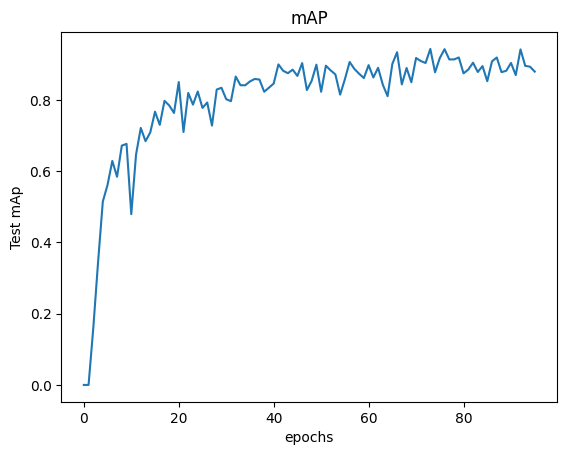

In [ ]:
corr=[]
for elem in map_array:
  corr.append(elem.tolist())
print(corr)
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = range(len(corr))
# corresponding y axis values
y = corr

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('epochs')
# naming the y axis
plt.ylabel('Test mAp')

# giving a title to my graph
plt.title('mAP')

# function to show the plot
plt.show()

In [ ]:
result=model.predict(IMG_DIR_TEST,conf=0.40,iou=0.5)
print(model.name)
for key in result:
  if len(result[key])>0:
    print(key,result[key])
    img_file_path=os.path.join(IMG_DIR_TEST,key)
    img = Image.open(img_file_path)
    print(img_file_path)
    plot_image(img, result[key])

vid_5_26720.jpg [[0.0, 0.9858934283256531, 0.7891772389411926, 0.5340237021446228, 0.17957276105880737, 0.1332322657108307], [0.0, 0.4696083962917328, 0.1881839483976364, 0.5564111471176147, 0.15981142222881317, 0.10352370887994766]]
/content/drive/MyDrive/archive/data/testing_images/vid_5_26720.jpg


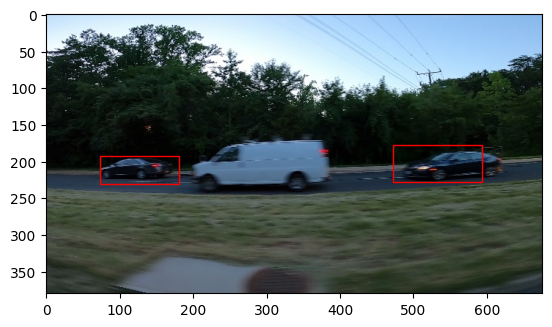

vid_5_400.jpg []
/content/drive/MyDrive/archive/data/testing_images/vid_5_400.jpg


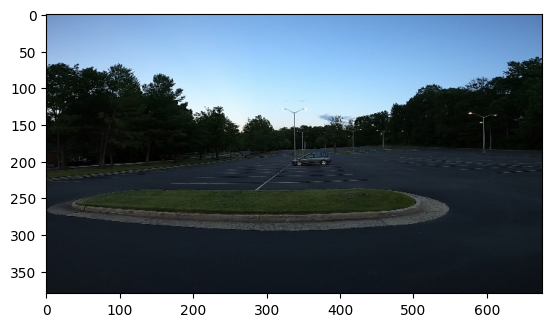

In [ ]:
test_images=drive_dir+'/testing_images'
result_2=model.predict(test_images,conf=0.40,iou=0.5)
imgs_name=['vid_5_400.jpg','vid_5_26720.jpg']
for key in result_2:
  if key in imgs_name:
  #if len(result_2[key])>0:
    print(key,result_2[key])
    img_file_path=os.path.join(test_images,key)
    img = Image.open(img_file_path)
    print(img_file_path)
    plot_image(img, result_2[key])

In [ ]:
for i in range(10):
    pred_boxes, target_boxes = get_bboxes(test_loader, model, iou_threshold=0.5, threshold=0.4, device=DEVICE) #Overfitting
    mean_avg_prec = mean_average_precision(pred_boxes, target_boxes, iou_threshold=0.5, box_format="midpoint")
    print(f"epoch: {epoch} Train mAP: {mean_avg_prec}")

epoch: 29 Train mAP: 0.8752071857452393
epoch: 29 Train mAP: 0.874947190284729
epoch: 29 Train mAP: 0.8740500211715698
epoch: 29 Train mAP: 0.8840476870536804
epoch: 29 Train mAP: 0.8900731801986694
epoch: 29 Train mAP: 0.8712455034255981
epoch: 29 Train mAP: 0.8737998008728027
epoch: 29 Train mAP: 0.8739861845970154
epoch: 29 Train mAP: 0.8724527955055237
epoch: 29 Train mAP: 0.8795523643493652
